## 공용 코드

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
import sys

# sklearn ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(21)

# 깔끔한 그래프 출력을 위해
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

# 매킨토시의 경우
if platform.system() == 'Darwin':
  rc('font', family='AppleGothic')
# 윈도우의 경우
elif platform.system() == 'Windows':
  font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
  rc('font', family=font_name)
  mpl.rcParams['axes.unicode_minus'] = False


## tensorflow

In [ ]:
# loss 값 시각화
import matplotlib.pyplot as plt
#plt.plot(history.history['loss'])

## Tensorflow Data API

In [ ]:
# 메모리에서 데이터 생성
# 아래 둘은 동일한 코드
# 0 ~ 9 까지 데이터를 생성

# tensorflow 도 range 를 사용할 수 있음
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
print(dataset)
for item in dataset:
  print(item)

dataset = tf.data.Dataset.range(10)
print(dataset)
for item in dataset:
  print(item)

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [ ]:
# repeat 을 사용하면 데이터를 반복
# batch 를 사용하면 데이터를 묶을 수 있음

# 0 ~ 9 를 3번 반복하고 5개씩 데이터를 묶음
dataset = dataset.repeat(3).batch(5)
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)


In [ ]:
# 남은 데이터의 갯수와 batch 의 크기가 다른 경우 남는 만큼 출력
dataset = tf.data.Dataset.range(10)
dataset = dataset.repeat(3).batch(7)
for item in dataset:
  print(item)

# batch 에 drop_remainder 를 사용하면 크기가 달라서 남는 데이터를 제거
dataset = tf.data.Dataset.range(10)
dataset = dataset.repeat(3).batch(7, drop_remainder = True)
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)
tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)


In [ ]:
dataset = tf.data.Dataset.range(10)

# num_parallel_calls 를 사용해서 사용할 스레드의 수를 지정
# 데이터를 변환할 때 2개의 스레드를 사용
# 사용자가 직접 확인할 방법은 없음
dataset = dataset.map(lambda x : x * 2, num_parallel_calls = 2)

for item in dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)


In [ ]:
# 데이터의 일부만 가져오는 take
dataset = tf.data.Dataset.range(10)

for item in dataset.take(4):
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)


In [ ]:
# 셔플링

# 0 ~ 39 까지의 숫자를 가지고 텐서를 생성
dataset = tf.data.Dataset.range(40)
# 버퍼의 크기는 5, 시드는 21로 설정하고 6개씩 묶어서 사용
# seed 는 없어도 되지만 buffer_size 는 필수 옵션
dataset = dataset.shuffle(buffer_size = 5, seed = 21).batch(6)

for item in dataset:
  print(item)

tf.Tensor([0 2 5 7 6 3], shape=(6,), dtype=int64)
tf.Tensor([ 1  8  4 13  9 15], shape=(6,), dtype=int64)
tf.Tensor([16 10 12 18 20 19], shape=(6,), dtype=int64)
tf.Tensor([22 17 14 23 25 21], shape=(6,), dtype=int64)
tf.Tensor([27 24 28 11 29 33], shape=(6,), dtype=int64)
tf.Tensor([34 31 26 37 36 39], shape=(6,), dtype=int64)
tf.Tensor([38 32 35 30], shape=(4,), dtype=int64)


In [ ]:
dataset = tf.data.Dataset.range(40)
data = dataset.shuffle(buffer_size = 5, seed = 21).take(1)

for d in data:
  print(data)


<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


In [ ]:
# 데이터를 읽어와서 나누어서 저장한 뒤 읽어오기

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# 데이터 읽어오기
housing = fetch_california_housing()
#print(housing.data)
#print(housing.target)

# 데이터를 2번 나눠서 3개로 구분
# train - 훈련, valid - 훈련 중 검증, test - 모델을 훈련한 후 확인
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                    housing.target.reshape(-1, 1),
                                                    random_state = 21)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                    y_train_full,
                                                    random_state = 21)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(11610, 8)
(3870, 8)
(5160, 8)


In [ ]:
# 데이터 전처리

# 스케일러 적용
scaler = StandardScaler()
scaler.fit(X_train)

# 평균과 표준 편차
X_mean = scaler.mean_
X_std = scaler.scale_

print(X_mean, X_std)

[ 3.85428093e+00  2.87125754e+01  5.42881978e+00  1.09851501e+00
  1.42694892e+03  3.01584195e+00  3.56394384e+01 -1.19579762e+02] [1.89215695e+00 1.25742921e+01 2.71706484e+00 5.31065466e-01
 1.11394840e+03 6.03305157e+00 2.13449170e+00 2.00542413e+00]


In [ ]:
# 데이터를 여러 개의 파일로 나눠서 저장하는 함수

# 매개변수는 데이터, 파일의 앞에 오는 공통 이름, 헤더 포함 여부, 파일의 갯수
def save_multi_csv_files(data, name_prefix, header = None, n_parts = 10):
  # 파일을 저장할 디렉토리 생성
  housing_dir = os.path.join('Datasets', 'housing')
  os.makedirs(housing_dir, exist_ok = True)

  # 파일 경로(파일명) 패턴 생성
  # my_prefix_숫자.csv 형태
  path_format = os.path.join(housing_dir, 'my_{}_{:02d}.csv')

  filepaths = [] # 파일 경로를 저장할 리스트
  m = len(data) # 데이터의 갯수

  # m 갯수만큼 숫자열을 만든 후(arange 함수) n_parts 갯수만큼 분할
  # 분할한 그룹 번호는 file_idx, 행 번호는 row_indices 에 저장
  for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
    # 실제 파일 경로 생성
    part_csv = path_format.format(name_prefix, file_idx)
    filepaths.append(part_csv)

    # 데이터를 기록
    with open(part_csv, 'wt', encoding = 'utf-8') as f:
      # 헤더가 None이 아니면 헤더 기록
      if header is not None:
        f.write(header)
        f.write('\n')

        # 행 인덱스를 가지고 데이터를 순회하면서 각 데이터를 , 로 구분해서 작성
        # repr 함수는 str 함수와 유사하지만 문자열로 객체를 다시 생성할 때 사용 가능
        for row_idx in row_indices:
          f.write(','.join([repr(col) for col in data[row_idx]]))

  return filepaths


In [ ]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]

headers_cols = housing.feature_names + ['MedianHouseValue']
header = ','.join(headers_cols)

train_filepaths = save_multi_csv_files(train_data, 'train', header, n_parts = 20)
valid_filepaths = save_multi_csv_files(train_data, 'valid', header, n_parts = 10)
test_filepaths = save_multi_csv_files(train_data, 'test', header, n_parts = 10)
# 파일 디렉토리에서 제대로 생성 되었는지 확인
# colab 의 경우 파일 목록의 Datasets 디렉토리 아래에 housing 디렉토리 아래 저장

In [ ]:
# 파일 이름을 랜덤하게 가져오기
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed = 21)
for filepath in filepath_dataset:
  print(filepath)

tf.Tensor(b'Datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_11.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_03.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'Datasets/housing/my_train_18.csv', shape=(), dtype=string)
tf.Ten

In [ ]:
# 3개의 파일에서 번갈아가면서 데이터 가져오기
# seed 를 설정하지 않았으므로 읽어올 때마다 순서가 달라짐

# 읽을 파일의 갯수
n_readers = 3

# 파일의 경로에 있는 내용을 3개씩 번갈아가면서(cycle_length)
# 줄 단위로 읽어오기(interleave)
dataset = filepath_dataset.interleave(
    lambda filepath : tf.data.TextLineDataset(filepath).skip(1),
    cycle_length = n_readers
)

for line in dataset.take(n_readers):
  print(line.numpy())

b'4.2011,41.0,5.05420054200542,1.062330623306233,825.0,2.2357723577235773,38.01,-122.68,2.5545.5277,30.0,5.781902552204176,0.9419953596287703,1250.0,2.9002320185614847,32.84,-117.19,1.9711.3329,40.0,4.28021978021978,1.0208791208791208,1782.0,1.9582417582417582,40.58,-122.4,0.7822.1776,22.0,5.4437229437229435,1.0432900432900434,1284.0,2.779220779220779,39.39,-121.59,0.7384.5278,26.0,7.636363636363637,1.069377990430622,1132.0,2.708133971291866,38.65,-121.3,1.4435.6293,15.0,6.4192307692307695,1.023076923076923,1834.0,3.526923076923077,38.03,-122.25,1.9763.5,21.0,4.304913294797688,1.0751445086705202,1824.0,2.6358381502890174,34.2,-118.58,2.2371.9531,52.0,4.723333333333334,1.1766666666666667,881.0,2.9366666666666665,33.98,-117.33,1.6253.4583,43.0,5.599264705882353,1.0238970588235294,1333.0,2.4503676470588234,37.7,-122.13,1.8372.9052,52.0,3.6545209176788123,1.0283400809716599,1460.0,1.9703103913630229,37.75,-122.42,4.04.3203,37.0,5.565826330532213,0.9719887955182073,1095.0,3.0672268907563027

### Dataset

In [ ]:
!pip install tensorflow-Datasets

In [ ]:
import tensorflow_datasets as tfds

# load 함수를 사용하며
# 데이터를 가져올 데이터 셋의 이름만 입력하면 됨
datasets = tfds.load(name = 'mnist')
mnist_train, mnist_test = datasets['train'], datasets['test']
#print(mnist_train, mnist_test)

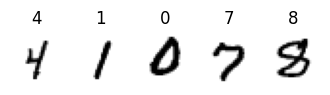

In [ ]:
plt.figure(figsize = (4, 4))

# 데이터를 전부 가져오는게 아니라 32개를 읽어서 가져오고
# 다음에 사용할 1묶음(32개)을 미리 가져오는 방식
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)

for item in mnist_train:
  images = item['image']
  labels = item['label']

  for index in range(5):
    plt.subplot(1, 5, index + 1)
    image = images[index, ..., 0]
    label = labels[index].numpy()
    plt.imshow(image, cmap = 'binary')
    plt.title(label)
    plt.axis('off')
    plt.grid('off')

  break;


In [ ]:
datasets = tfds.load(name = 'kmnist')
mnist_train, mnist_test = datasets['train'], datasets['test']

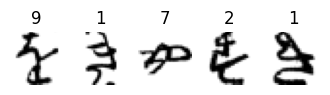

In [ ]:
plt.figure(figsize = (4, 4))

mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)

for item in mnist_train:
  images = item['image']
  labels = item['label']

  for index in range(5):
    plt.subplot(1, 5, index + 1)
    image = images[index, ..., 0]
    label = labels[index].numpy()
    plt.imshow(image, cmap = 'binary')
    plt.title(label)
    plt.axis('off')
    plt.grid('off')

  break;